In [117]:
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [226]:
class LazyClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, threshold=0.1):
        self.threshold = threshold
        #threshold here is a coefficient that determines, greater than what part of the length of positive 
        #objects should be the number of matches
    
    def fit(self,X,y):
        X, y = check_X_y(X, y)
        self.X = X
        self.y = y
        self.X_pos = X[y == 1]
        self.X_neg = X[y == 0]
        return self
        
    def predict(self, X):
        X = check_array(X)
        y_pred = []
        
        for x in X:
            num_pos = 0
            num_neg = 0
            for pos_x in self.X_pos:
                if np.sum(x == pos_x)> int(len(pos_x)*self.threshold):
                    num_pos += 1
            for neg_x in self.X_neg:
                if np.sum(x == neg_x) > int(len(neg_x)*self.threshold):
                    num_neg += 1
            
            num_pos = num_pos / float(len(self.X_pos))     
            num_neg = num_neg / float(len(self.X_neg))
            
            if (num_pos > num_neg):
                y_pred.append(1)
            else:
                y_pred.append(0)

        return np.array(y_pred)

In [256]:
df = pd.read_csv('data4ready.csv')
df

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,age_0,age_1,age_2,age_3,...,platelets_4,platelets_5,platelets_6,creatinine_phosphokinase_0,creatinine_phosphokinase_1,creatinine_phosphokinase_2,creatinine_phosphokinase_3,creatinine_phosphokinase_4,creatinine_phosphokinase_5,creatinine_phosphokinase_6
0,0,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,1,1,0,0,...,0,0,0,1,1,1,1,1,1,1
2,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,1,1,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
296,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
297,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [257]:
X = df.drop(['DEATH_EVENT'], axis = 1)
y = df.DEATH_EVENT

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [261]:
def print_metr(y_test, y_pred):
    TP = np.sum(y_test & y_pred)
    TN = np.sum(y_test + y_pred == 0)
    FP = np.sum((y_test  == 0) & (y_pred == 1))
    FN = np.sum((y_test  == 1) & (y_pred == 0))
    TPR = float(TP) / (TP + FN)
    TNR = float(TN) / (TN + FP)
    FPR = float(FP) / (FP + TN)
    NPV = float(TN) / (TN + FN)
    FDR = float(FP) / (TP + FP)
    acc = accuracy_score(y_test, y_pred)
    prc = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    avg = (TPR+TNR+FPR+NPV+FDR+acc+prc+rec+f1) / 9
    print("True positive:", TP ,"\n" 
            "True Negative:", TN,"\n"
            "False Positive:", FP,"\n"
            "False Negative:", FN,"\n"
            "True Positive Rate:", TPR,"\n"
            "True Negative Rate:", TNR,"\n"
            "Negative Predictive Value:", NPV,"\n"
            "False Positive Rate:",FPR,"\n"
            "False Discovery Rate:",FDR,"\n"
            "Accuracy:", acc,"\n"
            "Precision:", prc,"\n"
            "Recall:", rec,"\n"
            "F1 score:", f1
            )

In [262]:
for treshold in np.linspace(0.1, 1, 10):
    pred = LazyClassifier(treshold)
    pred.fit(X, y)
    y_pred1 = pred.predict(X_test)
    print("------------------------------------------------------")
    print("treshold:", treshold)
    print(print_metr(y_test, y_pred1))

------------------------------------------------------
treshold: 0.1
True positive: 0 
True Negative: 61 
False Positive: 0 
False Negative: 29 
True Positive Rate: 0.0 
True Negative Rate: 1.0 
Negative Predictive Value: 0.6777777777777778 
False Positive Rate: 0.0 
False Discovery Rate: nan 
Accuracy: 0.6777777777777778 
Precision: 0.0 
Recall: 0.0 
F1 score: 0.0
None


C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


------------------------------------------------------
treshold: 0.2
True positive: 0 
True Negative: 61 
False Positive: 0 
False Negative: 29 
True Positive Rate: 0.0 
True Negative Rate: 1.0 
Negative Predictive Value: 0.6777777777777778 
False Positive Rate: 0.0 
False Discovery Rate: nan 
Accuracy: 0.6777777777777778 
Precision: 0.0 
Recall: 0.0 
F1 score: 0.0
None


C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


------------------------------------------------------
treshold: 0.30000000000000004
True positive: 0 
True Negative: 61 
False Positive: 0 
False Negative: 29 
True Positive Rate: 0.0 
True Negative Rate: 1.0 
Negative Predictive Value: 0.6777777777777778 
False Positive Rate: 0.0 
False Discovery Rate: nan 
Accuracy: 0.6777777777777778 
Precision: 0.0 
Recall: 0.0 
F1 score: 0.0
None


C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


------------------------------------------------------
treshold: 0.4
True positive: 0 
True Negative: 61 
False Positive: 0 
False Negative: 29 
True Positive Rate: 0.0 
True Negative Rate: 1.0 
Negative Predictive Value: 0.6777777777777778 
False Positive Rate: 0.0 
False Discovery Rate: nan 
Accuracy: 0.6777777777777778 
Precision: 0.0 
Recall: 0.0 
F1 score: 0.0
None


C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


------------------------------------------------------
treshold: 0.5
True positive: 6 
True Negative: 61 
False Positive: 0 
False Negative: 23 
True Positive Rate: 0.20689655172413793 
True Negative Rate: 1.0 
Negative Predictive Value: 0.7261904761904762 
False Positive Rate: 0.0 
False Discovery Rate: 0.0 
Accuracy: 0.7444444444444445 
Precision: 1.0 
Recall: 0.20689655172413793 
F1 score: 0.34285714285714286
None
------------------------------------------------------
treshold: 0.6
True positive: 9 
True Negative: 54 
False Positive: 7 
False Negative: 20 
True Positive Rate: 0.3103448275862069 
True Negative Rate: 0.8852459016393442 
Negative Predictive Value: 0.7297297297297297 
False Positive Rate: 0.11475409836065574 
False Discovery Rate: 0.4375 
Accuracy: 0.7 
Precision: 0.5625 
Recall: 0.3103448275862069 
F1 score: 0.4
None
------------------------------------------------------
treshold: 0.7000000000000001
True positive: 19 
True Negative: 56 
False Positive: 5 
False Negativ

C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sasuc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [290]:
lazy = LazyClassifier(threshold=0.7)

In [291]:
lazy.fit(X_train, y_train)

LazyClassifier(threshold=0.7)

In [292]:
y_pred = lazy.predict(X_test)

In [293]:
print_metr(y_test, y_pred)

True positive: 21 
True Negative: 54 
False Positive: 7 
False Negative: 8 
True Positive Rate: 0.7241379310344828 
True Negative Rate: 0.8852459016393442 
Negative Predictive Value: 0.8709677419354839 
False Positive Rate: 0.11475409836065574 
False Discovery Rate: 0.25 
Accuracy: 0.8333333333333334 
Precision: 0.75 
Recall: 0.7241379310344828 
F1 score: 0.736842105263158


In [267]:
lr = LogisticRegression(random_state=42)

In [268]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [269]:
lr_pred = lr.predict(X_test)
print_metr(y_test, lr_pred)

True positive: 23 
True Negative: 57 
False Positive: 4 
False Negative: 6 
True Positive Rate: 0.7931034482758621 
True Negative Rate: 0.9344262295081968 
Negative Predictive Value: 0.9047619047619048 
False Positive Rate: 0.06557377049180328 
False Discovery Rate: 0.14814814814814814 
Accuracy: 0.8888888888888888 
Precision: 0.8518518518518519 
Recall: 0.7931034482758621 
F1 score: 0.8214285714285715


In [270]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [271]:
neigh.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [272]:
neight_pred = neigh.predict(X_test)

In [273]:
print_metr(y_test, neight_pred)

True positive: 18 
True Negative: 56 
False Positive: 5 
False Negative: 11 
True Positive Rate: 0.6206896551724138 
True Negative Rate: 0.9180327868852459 
Negative Predictive Value: 0.835820895522388 
False Positive Rate: 0.08196721311475409 
False Discovery Rate: 0.21739130434782608 
Accuracy: 0.8222222222222222 
Precision: 0.782608695652174 
Recall: 0.6206896551724138 
F1 score: 0.6923076923076923


In [274]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [275]:
ada_pr = adaboost.predict(X_test)

In [276]:
print_metr(y_test, ada_pr)

True positive: 22 
True Negative: 56 
False Positive: 5 
False Negative: 7 
True Positive Rate: 0.7586206896551724 
True Negative Rate: 0.9180327868852459 
Negative Predictive Value: 0.8888888888888888 
False Positive Rate: 0.08196721311475409 
False Discovery Rate: 0.18518518518518517 
Accuracy: 0.8666666666666667 
Precision: 0.8148148148148148 
Recall: 0.7586206896551724 
F1 score: 0.7857142857142857


In [277]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier(random_state=0).fit(X, y)

In [278]:
gpc_pr = gpc.predict(X_test)

In [279]:
print_metr(y_test, gpc_pr)

True positive: 26 
True Negative: 61 
False Positive: 0 
False Negative: 3 
True Positive Rate: 0.896551724137931 
True Negative Rate: 1.0 
Negative Predictive Value: 0.953125 
False Positive Rate: 0.0 
False Discovery Rate: 0.0 
Accuracy: 0.9666666666666667 
Precision: 1.0 
Recall: 0.896551724137931 
F1 score: 0.9454545454545454


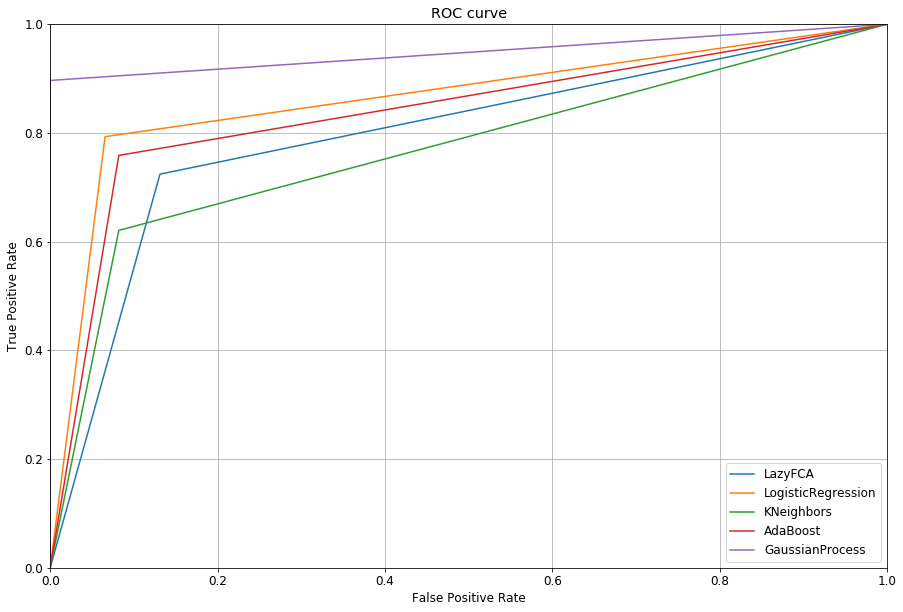

In [280]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, lr_pred)
fpr2, tpr2, thresholds1 = metrics.roc_curve(y_test, neight_pred)
fpr3, tpr3, thresholds1 = metrics.roc_curve(y_test, ada_pr)
fpr4, tpr4, thresholds1 = metrics.roc_curve(y_test, gpc_pr)
fig = plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label="LazyFCA")
plt.plot(fpr1, tpr1, label="LogisticRegression")
plt.plot(fpr2, tpr2, label="KNeighbors")
plt.plot(fpr3, tpr3, label="AdaBoost")
plt.plot(fpr4, tpr4, label="GaussianProcess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()

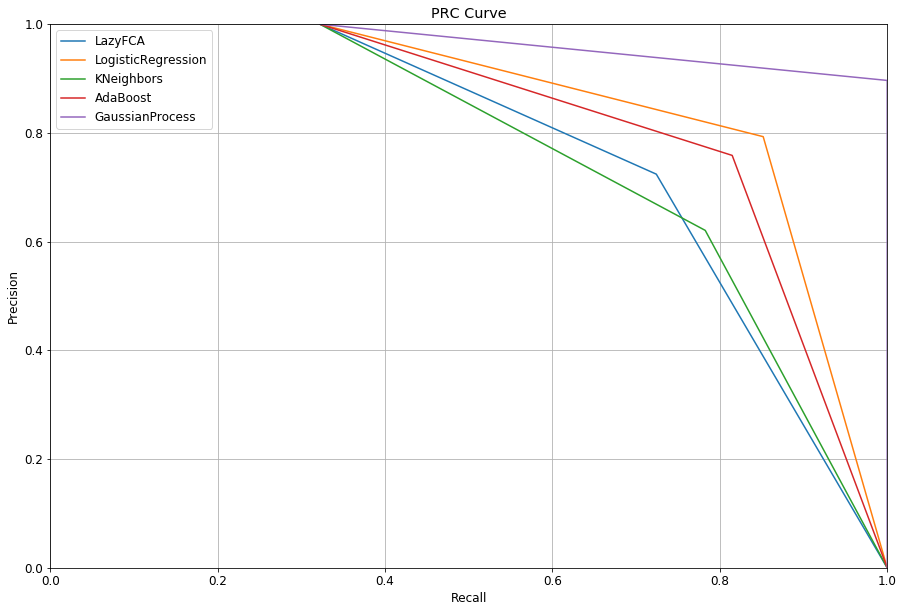

In [281]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
precision1, recall1, thresholds1 = metrics.precision_recall_curve(y_test, lr_pred)
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_test, neight_pred)
precision3, recall3, thresholds3 = metrics.precision_recall_curve(y_test, ada_pr)
precision4, recall4, thresholds4 = metrics.precision_recall_curve(y_test, gpc_pr)
fig = plt.figure(figsize=(15,10))
plt.plot(precision, recall, label="LazyFCA")
plt.plot(precision1, recall1, label="LogisticRegression")
plt.plot(precision2, recall2, label="KNeighbors")
plt.plot(precision3, recall3, label="AdaBoost")
plt.plot(precision4, recall4, label="GaussianProcess")
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.rcParams['font.size'] = 12
plt.title('PRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()